In [153]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [154]:
housing_prices = pd.read_csv('Bengaluru_House_Data.csv')

## Data exploration and cleaning

In [155]:
housing_prices.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [156]:
housing_prices.shape

(13320, 9)

In [157]:
housing_prices['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [158]:
housing_prices = housing_prices.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')

In [159]:
housing_prices.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [160]:
housing_prices = housing_prices.dropna()

In [161]:
housing_prices.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [162]:
housing_prices['bhk'] = housing_prices['size'].apply(lambda x: int(x.split(' ')[0]))

In [163]:
housing_prices

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [164]:
housing_prices[housing_prices['bhk']>10]

,location,size,total_sqft,bath,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [165]:
# returns an error, column needs clenaing
# np.mean(housing_prices['total_sqft'])

In [166]:
housing_prices['total_sqft'].unique()
# shows values with some ranges
# we need to investigate more values in total_sqft with non numeric values

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [167]:
def isFloat (x):
    try:
        float(x)
    except:
        return False
    return True

In [168]:
# Observe values where total_sqft is not just a number
housing_prices[~housing_prices['total_sqft'].apply(isFloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [169]:
def rangeToAvg (rang):
    """
    Convert a range to its average
    Return a metre value as it is
    """
    rang = str(rang)
    tokens = rang.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(rang)
    except:
        return rang

In [170]:
housing_prices['total_sqft'] = housing_prices['total_sqft'].apply(rangeToAvg)

In [171]:
# Re-observe values where total_sqft is not just a number
housing_prices[~housing_prices['total_sqft'].apply(isFloat)]

,location,size,total_sqft,bath,price,bhk
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.50,1
648,Arekere,9 Bedroom,4125Perch,9.0,265.00,9
775,Basavanagara,1 BHK,1000Sq. Meter,2.0,93.00,1
872,Singapura Village,2 BHK,1100Sq. Yards,2.0,45.00,2
1019,Marathi Layout,1 Bedroom,5.31Acres,1.0,110.00,1
1086,Narasapura,2 Bedroom,30Acres,2.0,29.50,2
1400,Chamrajpet,9 BHK,716Sq. Meter,9.0,296.00,9
1712,Singena Agrahara,3 Bedroom,1500Sq. Meter,3.0,95.00,3
1743,Hosa Road,3 BHK,142.61Sq. Meter,3.0,115.00,3
1821,Sarjapur,3 Bedroom,1574Sq. Yards,3.0,76.00,3


In [172]:
# There are multiple units written with different spacing and formats
# Find out total number of rows with these values
len(housing_prices[~housing_prices['total_sqft'].apply(isFloat)])

46

In [173]:
def convertToFloat (x):
    try:
        return float(x)
    except: 
        return None

In [174]:
housing_prices['location'] = housing_prices['location'].apply(lambda x: x.strip())

In [175]:
# Since there are just 46 rows with different units, we can ignore these values
housing_prices['total_sqft'] = housing_prices['total_sqft'].apply(convertToFloat)

In [176]:
housing_prices.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [177]:
housing_prices.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [178]:
# observe list of unique locations
housing_prices['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [179]:
# find total number of locations
len(housing_prices['location'].unique())

1293

To predict prices based on location, we'll have to reduce number of locations. (Dimensionality problem / Curse of dimensionality)

## Feature Engineering

In [180]:
housing_prices['price_per_sqft'] = housing_prices['price']*100000 / housing_prices['total_sqft']

In [181]:
housing_prices.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [182]:
location_stats = housing_prices.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [183]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [184]:
# dimensionality reduction
# find num of locations with less than 10 data points
len(location_stats[location_stats < 10])

1039

In [185]:
# club all locations with < 10 datapoints into a single location 'other'
other_locations = location_stats[location_stats < 10]

In [186]:
len(housing_prices['location'].unique())

1293

For predicting prices with 1293 locations

In [187]:
housing_prices['location'] = housing_prices['location'].apply(lambda x: 'Other' if x in other_locations else x)

In [188]:
housing_prices

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [189]:
len(housing_prices['location'].unique()) 

255

In [190]:
print(f'Rows before outlier removal = {len(housing_prices)}')

Rows before outlier removal = 13246


## Outlier detection & removal

In [191]:
housing_prices = housing_prices[~(housing_prices['total_sqft']/housing_prices['bhk']<300)]

In [192]:
# Remove outliers (price per sqft beyond 1 st deviation)
def removeOutlieres (df):
    result = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (mean - st)) & (subdf['price_per_sqft'] < (mean + st))]
        result = pd.concat([result, reduced_df], ignore_index = True)
    return result

In [193]:
housing_prices = removeOutlieres(housing_prices)

In [194]:
housing_prices.shape

(10222, 7)

### Some houses with fewer bedrooms are costlier than those with more, even in the same location
**A visualization will help**

In [195]:
def generateScatterPlot (df, location):
    bhk2 = df[(df['bhk'] == 2) & (df['location']==location)]
    bhk3 = df[(df['bhk']==3) & (df['location']==location)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker = '+', color = 'red', label = '3 BHK', s = 50)
    plt.xlabel('Total Square Feet area')
    plt.ylabel('Price Per Square Feet Area')
    plt.title(location)
    plt.legend()

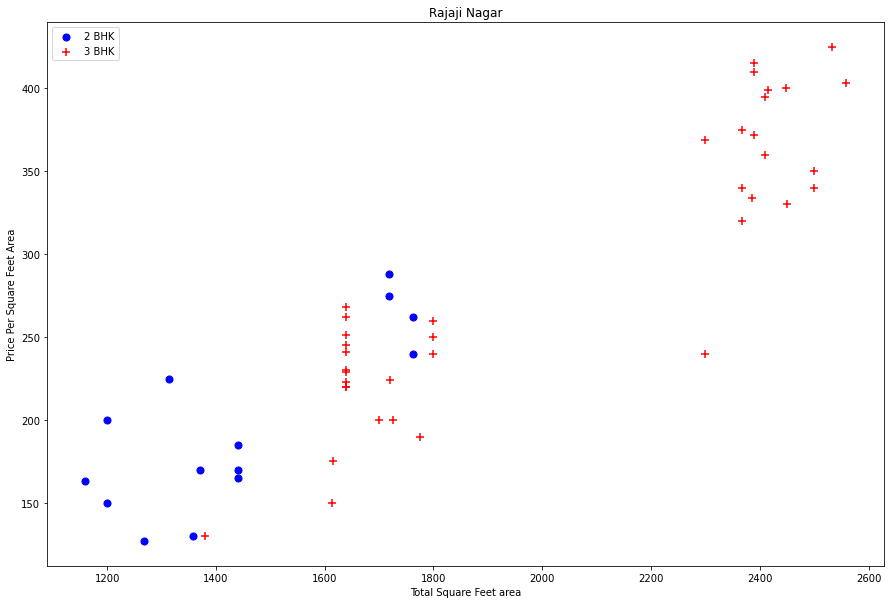

In [196]:
generateScatterPlot(housing_prices, 'Rajaji Nagar')

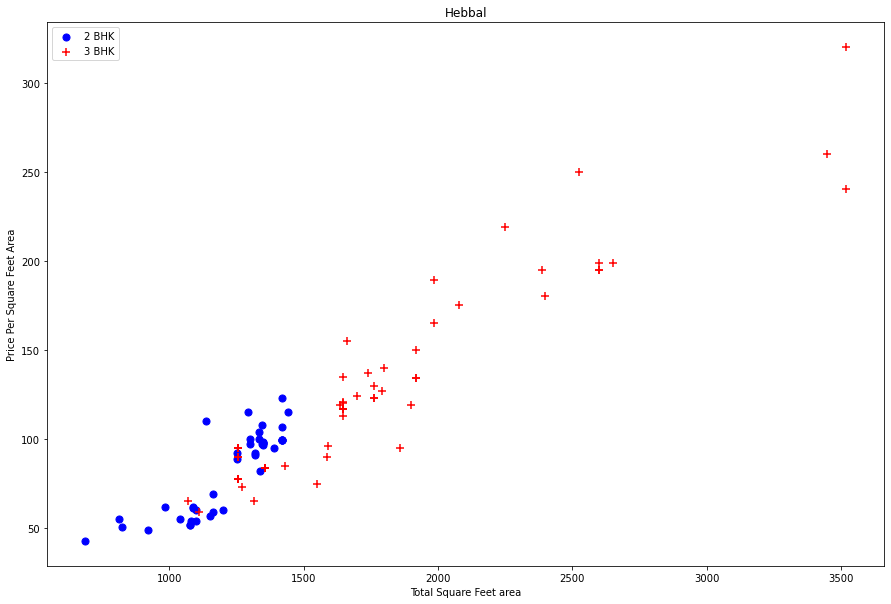

In [197]:
generateScatterPlot(housing_prices, 'Hebbal')

In [198]:
housing_prices.groupby('location')

**Find mean and standard deviation for each house size**

In [199]:
# Remove outliers (price per sqft beyond 1 st deviation)
def removeOutlieres (df):
    result = pd.DataFrame()
    exclude_indices = np.array([])
    for key, subdf in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in subdf.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'sd': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in subdf.groupby('bhk'):
            smaller_size_stats = bhk_stats.get(bhk-1)
            if smaller_size_stats and smaller_size_stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, 
                                           bhk_df[bhk_df['price_per_sqft'] < smaller_size_stats['mean']].index.values)
                
    return df.drop(exclude_indices, axis = 'index')

In [200]:
housing_prices = removeOutlieres(housing_prices)

In [201]:
housing_prices.shape

(7369, 7)

**Re-plot house area vs cost for different number of bedrooms to ensure outlier removal**

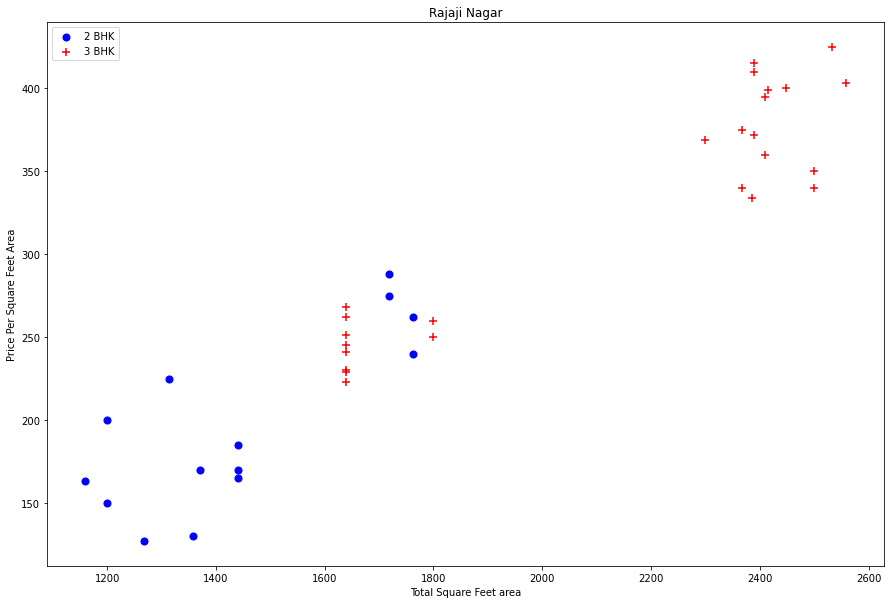

In [202]:
generateScatterPlot(housing_prices, 'Rajaji Nagar')

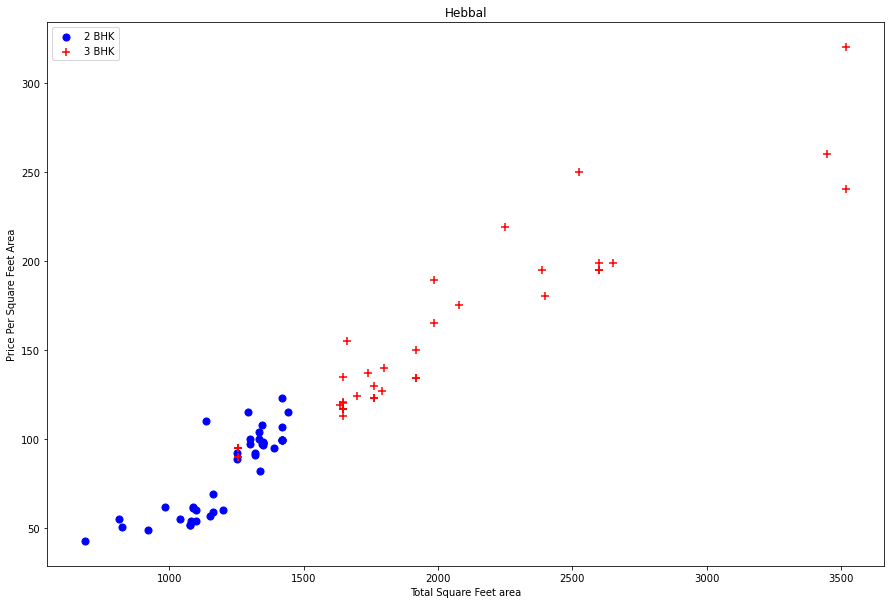

In [203]:
generateScatterPlot(housing_prices, 'Hebbal')

In [204]:
import seaborn as sns

**Plot distribution of price_per_sqft**

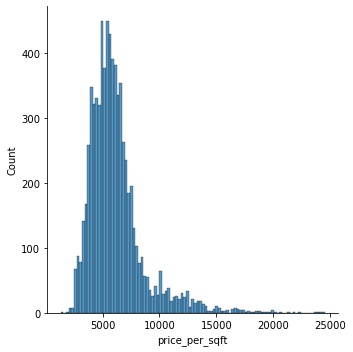

In [205]:
sns.displot(housing_prices, x="price_per_sqft")

In [210]:
housing_prices['price_per_sqft'].max()

24509.803921568626

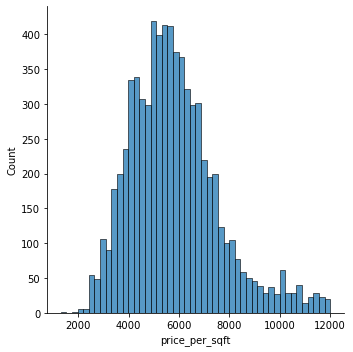

In [208]:
sns.displot(housing_prices[housing_prices['price_per_sqft'] < 12000], x="price_per_sqft")

Text(0, 0.5, 'Count')

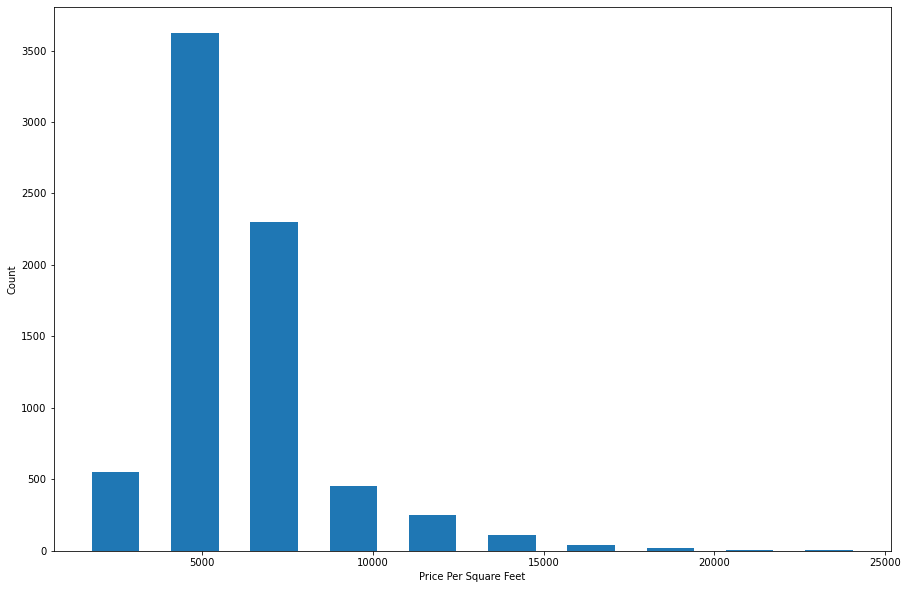

In [207]:
plt.clf()
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(housing_prices['price_per_sqft'], rwidth = 0.6)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

**Houses with significantly more bathrooms than room should be treated as outliers**

In [212]:
housing_prices = housing_prices[housing_prices['bath'] < housing_prices['bhk']+2]
housing_prices

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10211,Yeshwanthpur,2 BHK,1195.0,2.0,100.0,2,8368.200837
10212,Yeshwanthpur,3 BHK,1692.0,3.0,108.0,3,6382.978723
10214,Yeshwanthpur,6 Bedroom,2500.0,5.0,185.0,6,7400.000000
10219,Yeshwanthpur,3 BHK,1855.0,3.0,135.0,3,7277.628032


## Prepare data for ML